In [149]:
from pprint import pprint
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, recall_score,precision_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import scikitplot as skplt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [219]:
df = pd.read_csv('data_final.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

drop_variable = ["id"]
df = df.drop(drop_variable, axis = 1)

## Variables Summary

In [201]:
df.describe(include = 'all')

,rating,tell,leave,experience,hour,customer,people,flavor,salad,enjoy,pittsburgh,amazing,recommend,friendly,favorite,fresh,staff,x0_,x0_15017,x0_15044,x0_15104,x0_15106,x0_15116,x0_15120,x0_15136,x0_15201,x0_15202,x0_15203,x0_15205,x0_15206,x0_15207,x0_15208,x0_15209,x0_15210,x0_15211,x0_15212,x0_15213,x0_15214,x0_15215,x0_15216,x0_15217,x0_15218,x0_15219,x0_15220,x0_15221,x0_15222,x0_15223,x0_15224,x0_15226,x0_15227,x0_15228,x0_15229,x0_15232,x0_15233,x0_15234,x0_15236,x0_15237,x0_15238,x0_15240,x0_15241,x0_15243,x0_15289,x1_arcades,x1_argentine,x1_asianfusion,x1_bagels,x1_bakeries,x1_bars,x1_bbq,x1_bedbreakfast,x1_beerbar,x1_belgian,x1_bookstores,x1_brazilian,x1_breakfast_brunch,x1_breweries,x1_brewpubs,x1_british,x1_bubbletea,x1_buffets,x1_burgers,x1_burmese,x1_cafes,x1_cajun,x1_cambodian,x1_cantonese,x1_caribbean,x1_chicken_wings,x1_chickenshop,x1_chinese,x1_chocolate,x1_cocktailbars,x1_coffee,x1_coffeeroasteries,x1_colombian,x1_comfortfood,x1_creperies,x1_delis,x1_desserts,x1_diners,x1_divebars,x1_dominican,x1_ethiopian,x1_falafel,x1_fishnchips,x1_fondue,x1_food_court,x1_foodstands,x1_foodtrucks,x1_french,x1_galleries,x1_gastropubs,x1_gaybars,x1_german,x1_giftshops,x1_gluten_free,x1_greek,x1_grocery,x1_halal,x1_healthmarkets,x1_himalayan,x1_hookah_bars,x1_hotdog,x1_hotdogs,x1_hotpot,x1_hungarian,x1_icecream,x1_indpak,x1_irish,x1_italian,x1_japanese,x1_jazzandblues,x1_juicebars,x1_karaoke,x1_korean,x1_latin,x1_lounges,x1_meats,x1_mediterranean,x1_mexican,x1_mideastern,x1_modern_european,x1_mongolian,x1_moroccan,x1_newamerican,x1_newmexican,x1_noodles,x1_pizza,x1_polish,x1_portuguese,x1_pubs,x1_ramen,x1_salad,x1_salvadoran,x1_sandwiches,x1_seafood,x1_smokehouse,x1_social_clubs,x1_soulfood,x1_southern,x1_spanish,x1_sportsbars,x1_steak,x1_streetvendors,x1_sushi,x1_syrian,x1_szechuan,x1_tacos,x1_taiwanese,x1_tapasmallplates,x1_tex-mex,x1_thai,x1_tradamerican,x1_turkish,x1_vegan,x1_vegetarian,x1_venezuelan,x1_vietnamese,x1_wine_bars,x1_winetastingroom,x2_$,x2_$$,x2_$$$,x2_$$$$,x2_No price,x3_No Service,x3_delivery,"x3_delivery,pickup","x3_delivery,restaurant_reservation",x3_pickup,"x3_pickup,delivery","x3_pickup,restaurant_reservation",x3_restaurant_reservation,"x3_restaurant_reservation,delivery","x3_restaurant_reservation,pickup","x3_restaurant_reservation,pickup,delivery"
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.00000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.00000,995.000000,995.00000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.00000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.00000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.00000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.00000,995

## Normalizing data

In [21]:
normalized_variables = "tell leave experience hour customer people flavor salad enjoy pittsburgh amazing recommend friendly favorite fresh staff"

# Get column names first
normalized_list = normalized_variables.split(" ")

for col in normalized_list:
    if col in df.columns:
        df[col].update((df[col] - df[col].min()) / (df[col].max() - df[col].min())) 

## Train_test split

In [183]:
X = df.drop(['rating'], axis = 1)
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=40, shuffle = True)

X_train = scipy.sparse.csr_matrix(X_train.values)
y_train = np.array(y_train)

## Function to generate performance metrics from best model

In [178]:
def get_performance(model, X_test, y_test, name = "Logistic"):
    y_predict = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    print('Accuracy Score : ' + str(accuracy_score(y_test, y_predict)))
    print('Precision Score : ' + str(precision_score(y_test, y_predict,average = 'macro' )))
    print('Recall Score : ' + str(recall_score(y_test, y_predict, average = 'macro')))
    print('F1 Score : ' + str(f1_score(y_test, y_predict,average='macro')))

    print("\nROC plot for fine-tuned " +name+ " model is displayed below:")
    skplt.metrics.plot_roc_curve(y_test, y_prob)
    plt.show()

## Logistic Regression

In [217]:
log = LogisticRegression(solver = 'lbfgs', multi_class= 'multinomial', max_iter= 10000).fit(X_train,y_train)

In [218]:
C = [0.001, 0.01, 0.1, 1.0, 10.0, 50.0, 100.0, 500.0]
class_weight = [{1:0.33,2:0.33, 3:0.34}, {1:0.5,2:0.25, 3:0.25}, {1:0.25,2:0.5,3:0.25}, {1:0.25,2:0.25, 3:0.5}]


param_grid = dict(C=C,class_weight=class_weight)

grid_set_log = GridSearchCV(estimator=log, param_grid=param_grid, iid = True, scoring='accuracy', cv = 10)

grid_log = grid_set_log.fit(X_train, y_train)

print('Best Score: ', grid_log.best_score_)
print('Best Params: ', grid_log.best_params_)

Best Score:  0.699748743718593
Best Params:  {'C': 0.1, 'class_weight': {1: 0.33, 2: 0.33, 3: 0.34}}


Accuracy Score : 0.5979899497487438
Precision Score : 0.7184530445400011
Recall Score : 0.5825553203423257
F1 Score : 0.5726833552920509

ROC plot for fine-tuned Logistic Regression model is displayed below:


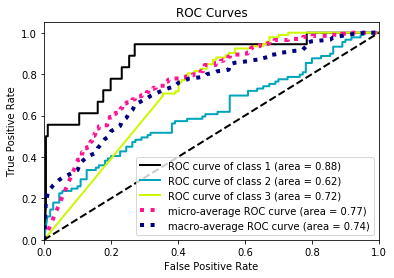

In [213]:
get_performance(grid_log, X_test, y_test, name = "Logistic Regression")

## SVM

In [138]:
param_grid = [{'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]}, 
              {'kernel': ['rbf'],'C': [0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01,0.1, 1]}] 

 
grid_set_svm = GridSearchCV(svm.SVC(decision_function_shape= 'ovo', probability = True), 
                            param_grid, scoring = 'accuracy', cv = 10) 
  
# fitting the model for grid search 
grid_svm = grid_set_svm.fit(X_train, y_train)
print('Best Score: ', grid_svm.best_score_)
print('Best Params: ', grid_svm.best_params_)

Best Score:  0.6557788944723618
Best Params:  {'C': 10, 'kernel': 'linear'}


Accuracy Score : 0.5879396984924623
Precision Score : 0.5355808836697623
Recall Score : 0.5041298015162207
F1 Score : 0.5146837733366231

ROC plot for fine-tuned SVM model is displayed below:


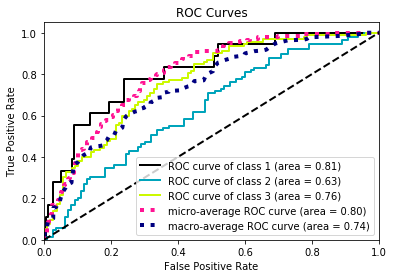

In [180]:
get_performance(grid_svm, X_test, y_test, name = "SVM")

In [184]:
df = pd.read_csv('data_final.csv')
drop_variable = ["id"]
df = df.drop(drop_variable, axis = 1)
X = df.drop(['rating'], axis = 1)
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=40, shuffle = True)

X_train = scipy.sparse.csr_matrix(X_train.values)
y_train = np.array(y_train)

## Random Forest

In [186]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [50, 87, 125, 162, 200]}


In [203]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()

# Random search of parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 10, random_state=42)
# Fit the random search model
search = rf_random.fit(X_train, y_train)
print('Random Search parameters: ', search.best_params_)

Random Search parameters:  {'n_estimators': 162, 'max_features': 'auto', 'max_depth': 35, 'bootstrap': False}


In [206]:
n_estimators = [30, 50 , 100, 150]
max_depth = [50, 100 , 150, 200]

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

grid_set_rf = GridSearchCV(estimator = RandomForestClassifier(max_features = 'auto',bootstrap = 'False' ), 
                           param_grid = param_grid, cv = 10)

grid_rf = grid_set_rf.fit(X_train, y_train)
print('Best Score: ', grid_rf.best_score_)
print('Best Params: ', grid_rf.best_params_)

Best Score:  0.6457286432160804
Best Params:  {'max_depth': 200, 'n_estimators': 150}


Accuracy Score : 0.592964824120603
Precision Score : 0.5570755433956528
Recall Score : 0.44707249995476667
F1 Score : 0.4330028532726173

ROC plot for fine-tuned Random Forest model is displayed below:


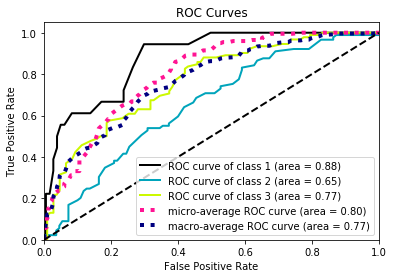

In [205]:
get_performance(grid_rf, X_test, y_test, name = "Random Forest")

In [243]:
rf = RandomForestClassifier(max_depth = 200, n_estimators=150, 
                            max_features = 'auto',bootstrap = 'False').fit(X_train, y_train)



In [228]:
t = rf.feature_importances_*-1

In [230]:
indx = np.argsort(t)

In [234]:
col = df.columns[1:]

In [235]:
feature_importances_rf = []
for i in indx:
    feature_importances_rf.append(col[i])

In [236]:
feature_importances_rf

['customer',
 'hour',
 'amazing',
 'fresh',
 'friendly',
 'tell',
 'favorite',
 'experience',
 'flavor',
 'pittsburgh',
 'people',
 'recommend',
 'leave',
 'salad',
 'staff',
 'enjoy',
 'x2_No price',
 'x3_No Service',
 'x3_delivery,pickup',
 'x2_$',
 'x2_$$',
 'x1_pizza',
 'x1_mexican',
 'x0_15213',
 'x0_15222',
 'x3_pickup,delivery',
 'x1_chinese',
 'x0_15219',
 'x3_delivery',
 'x1_newamerican',
 'x0_15224',
 'x1_seafood',
 'x0_15237',
 'x1_sandwiches',
 'x0_15203',
 'x0_15217',
 'x1_bars',
 'x0_15238',
 'x1_coffee',
 'x1_tradamerican',
 'x1_italian',
 'x0_15201',
 'x1_delis',
 'x1_bagels',
 'x0_15232',
 'x0_15228',
 'x0_15212',
 'x1_sportsbars',
 'x0_15206',
 'x2_$$$',
 'x0_15211',
 'x0_15216',
 'x3_pickup',
 'x1_thai',
 'x0_15236',
 'x1_diners',
 'x1_breakfast_brunch',
 'x0_15220',
 'x0_15205',
 'x1_japanese',
 'x0_15234',
 'x0_15221',
 'x1_indpak',
 'x1_cafes',
 'x1_bbq',
 'x1_burgers',
 'x0_15233',
 'x1_buffets',
 'x1_sushi',
 'x1_vietnamese',
 'x1_salad',
 'x1_mediterranean',
 '